In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
data=pd.read_csv("winequality-white.csv",sep=";")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

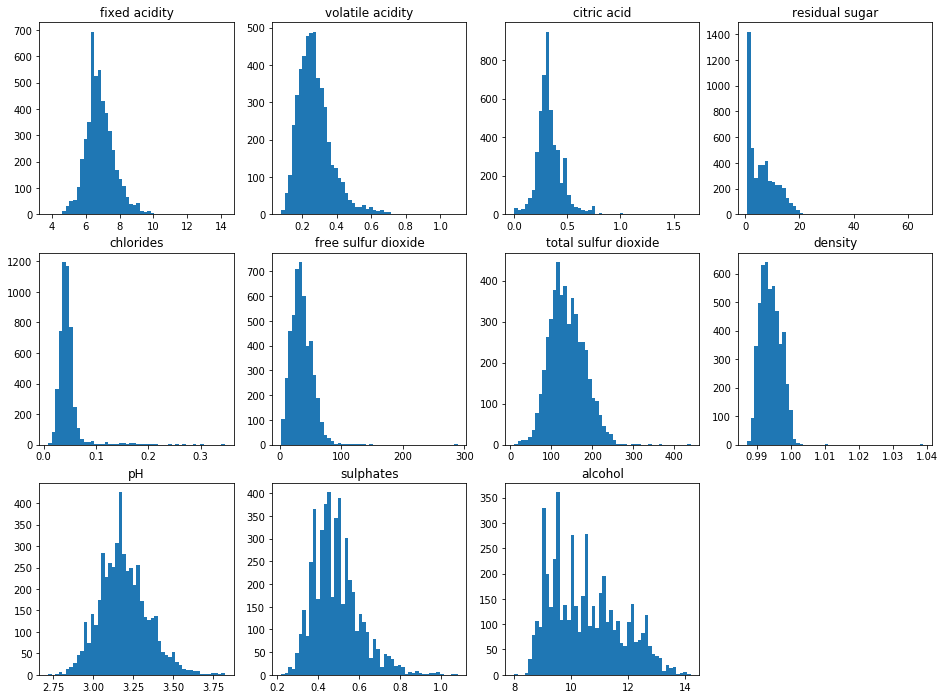

In [31]:
fig=plt.figure(figsize=(16,12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4,feat_idx+1)
    h = ax.hist(X.iloc[:,feat_idx],bins=50)
    ax.set_title(X.columns[feat_idx])

In [34]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
Xscaled=pd.DataFrame(scaler.fit_transform(X))
Xscaled.columns=X.columns

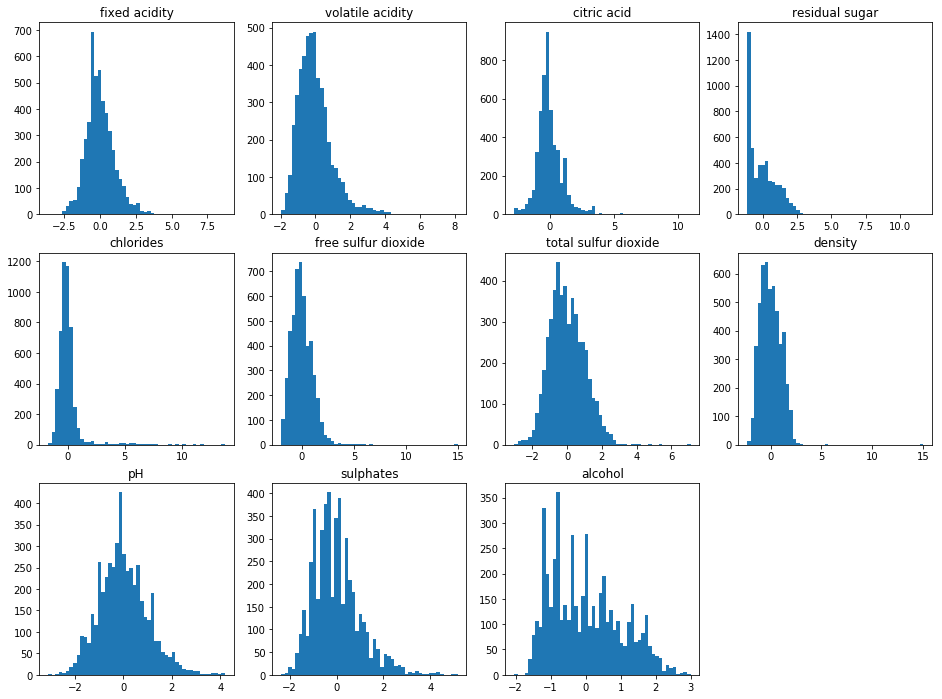

In [35]:
fig=plt.figure(figsize=(16,12))
for feat_idx in range(Xscaled.shape[1]):
    ax = fig.add_subplot(3,4,feat_idx+1)
    h = ax.hist(Xscaled.iloc[:,feat_idx],bins=50)
    ax.set_title(Xscaled.columns[feat_idx])

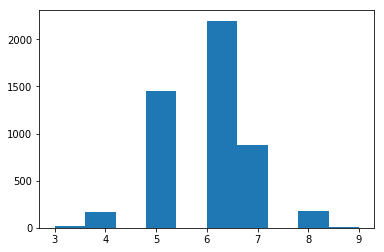

In [38]:
plot=plt.hist(y)

In [51]:
yclass=np.where(y>=6,1,0)

In [52]:
from sklearn import model_selection
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(Xscaled,yclass)

In [75]:
from sklearn import metrics, neighbors

clf=model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),{"n_neighbors":range(2,25)}, scoring="accuracy", cv=5,return_train_score=False)
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(2, 25)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='accuracy', verbose=0)

In [76]:
clf.best_params_

{'n_neighbors': 24}

In [77]:
res=pd.DataFrame(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002607,4.909332e-04,0.025468,0.003015,2,{'n_neighbors': 2},0.710204,0.714286,0.745578,0.717007,0.758527,0.729104,0.019281,23
1,0.002206,4.012109e-04,0.025668,0.001860,3,{'n_neighbors': 3},0.760544,0.715646,0.779592,0.746939,0.768076,0.754152,0.021988,8
2,0.002409,4.936502e-04,0.027671,0.001967,4,{'n_neighbors': 4},0.742857,0.707483,0.756463,0.752381,0.753070,0.742445,0.018062,22
3,0.002006,1.784161e-07,0.029478,0.001360,5,{'n_neighbors': 5},0.753741,0.726531,0.765986,0.752381,0.766712,0.753063,0.014548,12
4,0.002206,4.012347e-04,0.029879,0.002141,6,{'n_neighbors': 6},0.740136,0.727891,0.759184,0.744218,0.757162,0.745712,0.011520,21
5,0.002206,4.010916e-04,0.031283,0.001474,7,{'n_neighbors': 7},0.767347,0.734694,0.749660,0.748299,0.763984,0.752791,0.011787,14
6,0.002406,4.914587e-04,0.032887,0.001944,8,{'n_neighbors': 8},0.767347,0.734694,0.751020,0.746939,0.757162,0.751429,0.010834,17
7,0.002005,3.162980e-07,0.033288,0.001725,9,{'n_neighbors': 9},0.765986,0.736054,0.759184,0.744218,0.765348,0.754152,0.011975,8
8,0.002202,4.030462e-04,0.033489,0.001965,10,{'n_neighbors': 10},0.768707,0.731973,0.748299,0.751020,0.774898,0.754969,0.015326,6
9,0.002005,2.132481e-07,0.034091,0.002006,11,{'n_neighbors': 11},0.768707,0.729252,0.744218,0.746939,0.766712,0.751157,0.014803,18


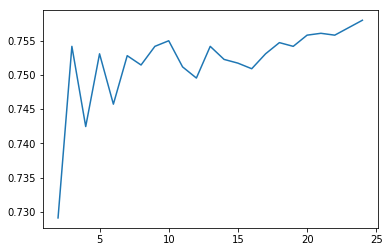

In [78]:
plot=plt.plot(res.param_n_neighbors,res.mean_test_score)

In [84]:
metrics.accuracy_score(ytest,clf.predict(Xtest))

0.7828571428571428